### 1. Load the data set

In [366]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [367]:
prk_df=pd.read_csv("parkinsons.data")

### 2. It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the data set. 

Each column in the table is a particular voice measure, and each row corresponds one of 195 voice  recording from these individuals ("name" column).

#### Attribute Information:

name - ASCII subject name and recording number

MDVP:Fo(Hz) - Average vocal fundamental frequency

MDVP:Fhi(Hz) - Maximum vocal fundamental frequency

MDVP:Flo(Hz) - Minimum vocal fundamental frequency

MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several 

measures of variation in fundamental frequency

Several measures of variation in amplitude -
MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA

NHR,HNR - Two measures of ratio of noise to tonal components in the voice

status - Health status of the subject (one) - Parkinson's, (zero) - healthy

RPDE,D2 - Two nonlinear dynamical complexity measures

DFA - Signal fractal scaling exponent

spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation 

In [368]:
prk_df.shape

(195, 24)

In [369]:
prk_df.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [370]:
prk_df.columns = prk_df.columns.str.replace(':','_')

In [371]:
prk_df.head(3)

,name,MDVP_Fo(Hz),MDVP_Fhi(Hz),MDVP_Flo(Hz),MDVP_Jitter(%),MDVP_Jitter(Abs),MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634


In [372]:
features = prk_df.select_dtypes(include=['floating'])
print("The number of features in the data are: ") 
print(len(features.columns),'\n')

print("The features are:\n")
print(list(features.columns))

The number of features in the data are: 
22 

The features are:

['MDVP_Fo(Hz)', 'MDVP_Fhi(Hz)', 'MDVP_Flo(Hz)', 'MDVP_Jitter(%)', 'MDVP_Jitter(Abs)', 'MDVP_RAP', 'MDVP_PPQ', 'Jitter_DDP', 'MDVP_Shimmer', 'MDVP_Shimmer(dB)', 'Shimmer_APQ3', 'Shimmer_APQ5', 'MDVP_APQ', 'Shimmer_DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']


#### Target column is "status" which is set to 0 for healthy and 1 for Parkinson's Disease.

In [373]:
prk_df.groupby('status').size()

status
0     48
1    147
dtype: int64

AxesSubplot(0.125,0.125;0.775x0.755)


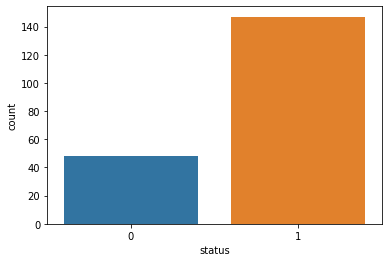

In [374]:
prk_df.groupby(["status"]).count()
print(sns.countplot(x="status", data=prk_df))

### 3. Using uni-variate & bi-variate analysis to check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations? 


In [375]:
print(" The missing values in data is :", prk_df.isnull().sum().sum(),'\n')

 The missing values in data is : 0 



**There is no missind data in the data set**

In [376]:
prk_df.describe()

,MDVP_Fo(Hz),MDVP_Fhi(Hz),MDVP_Flo(Hz),MDVP_Jitter(%),MDVP_Jitter(Abs),MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer(dB),...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,...,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,...,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,...,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,...,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,...,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,...,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,...,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [377]:
true_prk = prk_df[prk_df['status'] == 1]
true_prk.describe()

,MDVP_Fo(Hz),MDVP_Fhi(Hz),MDVP_Flo(Hz),MDVP_Jitter(%),MDVP_Jitter(Abs),MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer(dB),...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,...,147.000000,147.000000,147.000000,147.0,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.053027,0.029211,20.974048,1.0,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828
std,32.348050,88.339180,32.274358,0.005240,0.000037,0.003241,0.002998,0.009724,0.019970,0.207798,...,0.032391,0.044447,4.339143,0.0,0.101254,0.054786,0.970792,0.077809,0.375742,0.084271
min,88.333000,102.145000,65.476000,0.001680,0.000010,0.000680,0.000920,0.002040,0.010220,0.090000,...,0.013640,0.002310,8.441000,1.0,0.263654,0.574282,-7.120925,0.063412,1.765957,0.093193
25%,117.572000,133.776500,80.875500,0.004005,0.000030,0.002030,0.002190,0.006085,0.018295,0.168000,...,0.027400,0.008445,18.782000,1.0,0.439064,0.685569,-6.038300,0.199507,2.180933,0.170103
50%,145.174000,163.335000,99.770000,0.005440,0.000040,0.002840,0.003140,0.008530,0.028380,0.263000,...,0.044510,0.016580,21.414000,1.0,0.530529,0.726652,-5.440040,0.240875,2.439597,0.222716
75%,170.071000,207.160500,129.240000,0.007670,0.000060,0.004100,0.004360,0.012300,0.042525,0.394500,...,0.068455,0.027960,24.164500,1.0,0.604573,0.764868,-4.664067,0.303660,2.668479,0.274397
max,223.361000,588.518000,199.020000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,...,0.169420,0.314820,29.928000,1.0,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [378]:
false_prk = prk_df[prk_df['status'] == 0]
false_prk.describe()

,MDVP_Fo(Hz),MDVP_Fhi(Hz),MDVP_Flo(Hz),MDVP_Jitter(%),MDVP_Jitter(Abs),MDVP_RAP,MDVP_PPQ,Jitter_DDP,MDVP_Shimmer,MDVP_Shimmer(dB),...,Shimmer_DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,...,48.000000,48.000000,48.00000,48.0,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.028511,0.011483,24.67875,0.0,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
std,52.731067,96.727067,58.757070,0.002055,0.000015,0.001066,0.000943,0.003199,0.005544,0.057822,...,0.010368,0.019088,3.43454,0.0,0.092199,0.051346,0.642782,0.062982,0.310269,0.044820
min,110.739000,113.597000,74.287000,0.001780,0.000007,0.000920,0.001060,0.002760,0.009540,0.085000,...,0.014030,0.000650,17.88300,0.0,0.256570,0.626710,-7.964984,0.006274,1.423287,0.044539
25%,120.947500,139.413250,98.243750,0.002655,0.000010,0.001332,0.001480,0.003998,0.014475,0.129000,...,0.022060,0.004188,22.99325,0.0,0.372126,0.654291,-7.257665,0.120623,1.974217,0.094658
50%,198.996000,231.161500,113.938500,0.003355,0.000025,0.001625,0.001775,0.004875,0.016705,0.154000,...,0.026330,0.004825,24.99700,0.0,0.435368,0.682527,-6.826448,0.167356,2.129510,0.115119
75%,229.077000,251.239250,199.183000,0.004530,0.000030,0.001907,0.002228,0.005725,0.020210,0.189250,...,0.034540,0.009213,26.13925,0.0,0.507748,0.742284,-6.350146,0.193766,2.339487,0.147761
max,260.105000,592.030000,239.170000,0.013600,0.000080,0.006240,0.005640,0.018730,0.040870,0.405000,...,0.070080,0.107150,33.04700,0.0,0.663842,0.785714,-5.198864,0.291954,2.882450,0.252404


In [380]:
ind_var = list(prk_df.drop(['name','status'], axis=1).columns)
for col in ind_var:
    print( "The range of column", col, " with Parkinson's disease is :", true_prk[col].max()-true_prk[col].min())
    print( "The range of column", col, " with out Parkinson's disease is :", false_prk[col].max()-false_prk[col].min())
    print("\n")

The range of column MDVP_Fo(Hz)  with Parkinson's disease is : 135.028
The range of column MDVP_Fo(Hz)  with out Parkinson's disease is : 149.366


The range of column MDVP_Fhi(Hz)  with Parkinson's disease is : 486.37300000000005
The range of column MDVP_Fhi(Hz)  with out Parkinson's disease is : 478.433


The range of column MDVP_Flo(Hz)  with Parkinson's disease is : 133.544
The range of column MDVP_Flo(Hz)  with out Parkinson's disease is : 164.88299999999998


The range of column MDVP_Jitter(%)  with Parkinson's disease is : 0.03148
The range of column MDVP_Jitter(%)  with out Parkinson's disease is : 0.011819999999999999


The range of column MDVP_Jitter(Abs)  with Parkinson's disease is : 0.00025
The range of column MDVP_Jitter(Abs)  with out Parkinson's disease is : 7.300000000000001e-05


The range of column MDVP_RAP  with Parkinson's disease is : 0.02076
The range of column MDVP_RAP  with out Parkinson's disease is : 0.00532


The range of column MDVP_PPQ  with Parkinson's di

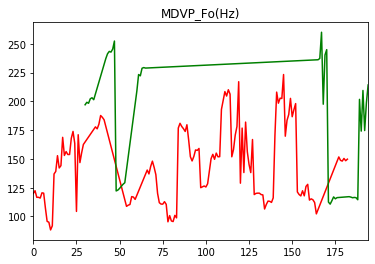

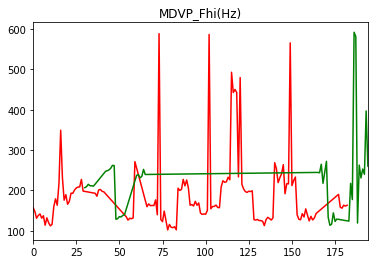

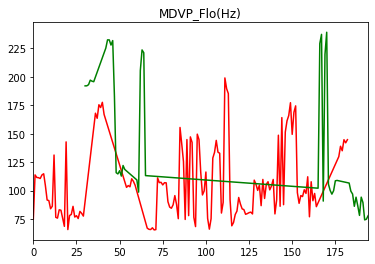

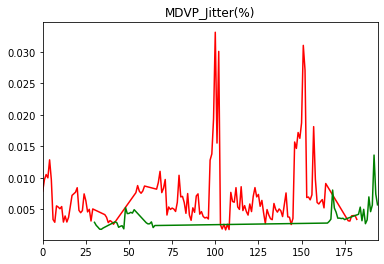

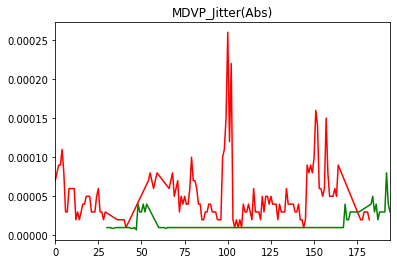

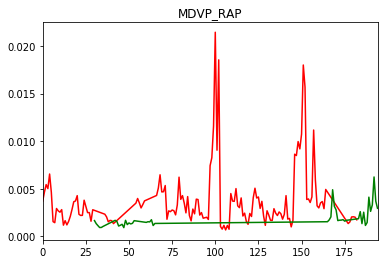

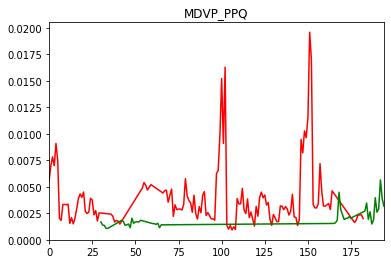

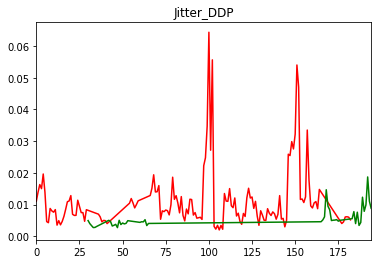

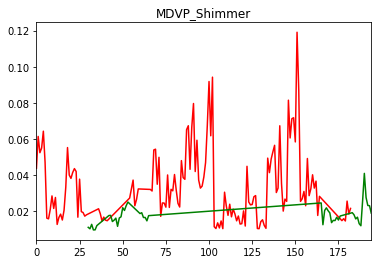

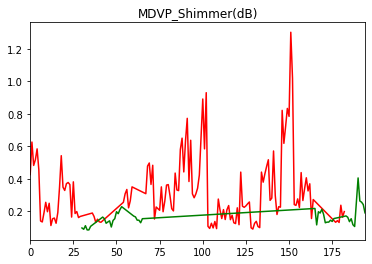

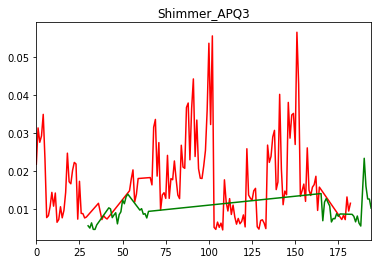

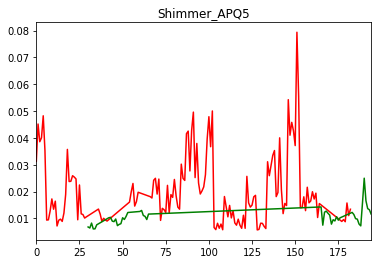

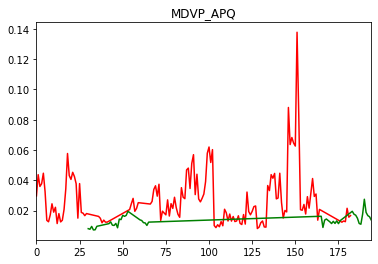

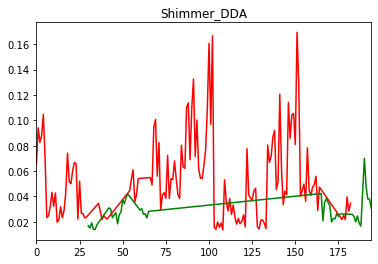

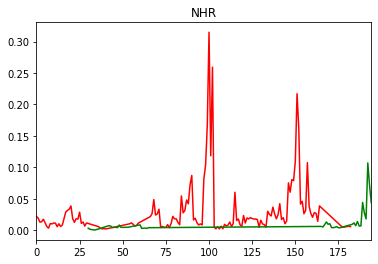

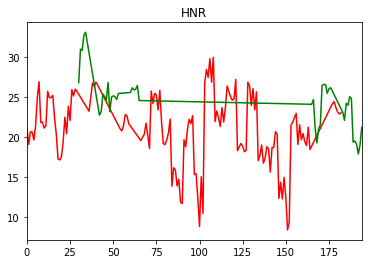

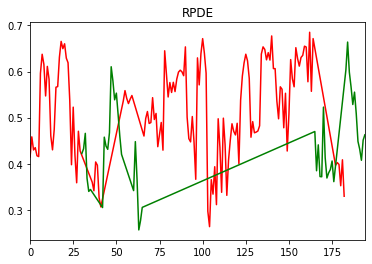

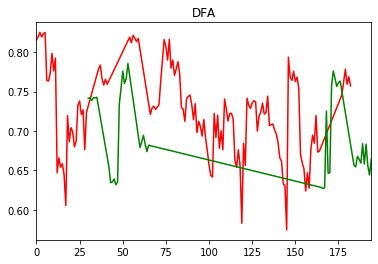

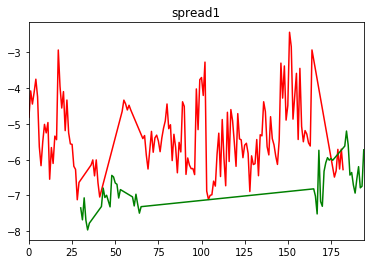

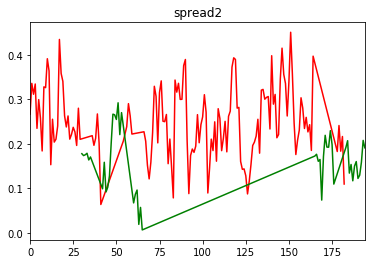

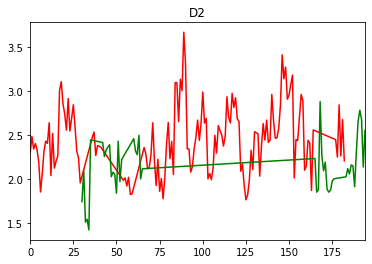

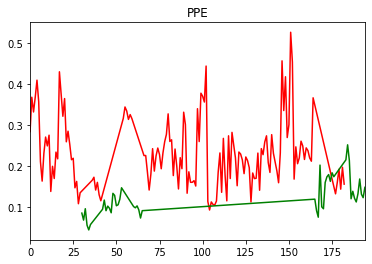

In [365]:
for i, col in enumerate(ind_var):
    true_prk[col].plot(fig=plt.figure(i),color = 'r')
    false_prk[col].plot(fig=plt.figure(i),color = 'g')
    plt.title(col)

plt.show()

AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)
AxesSubplot(0.1,0.15;0.8x0.75)


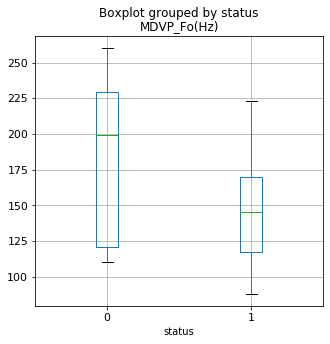

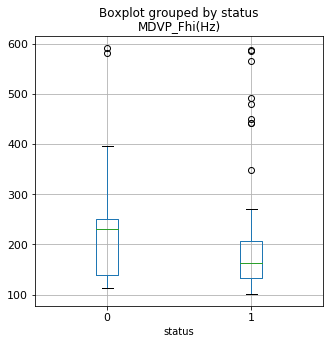

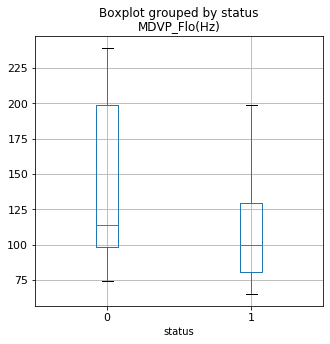

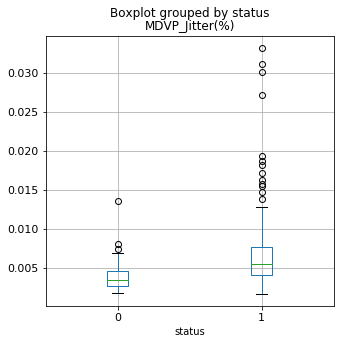

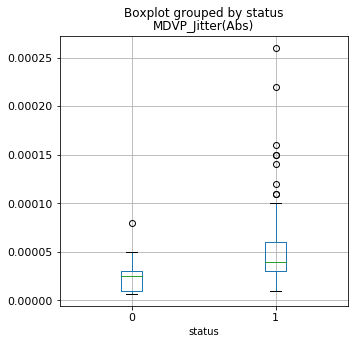

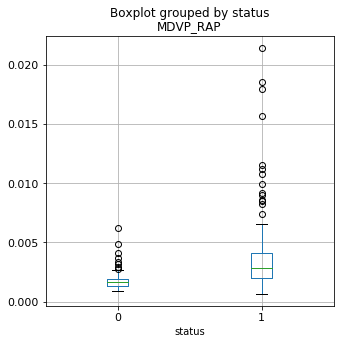

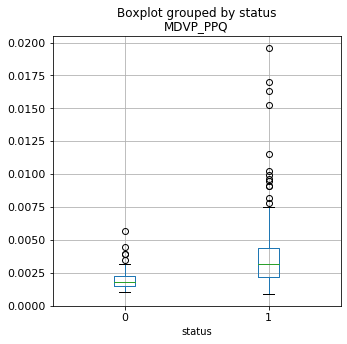

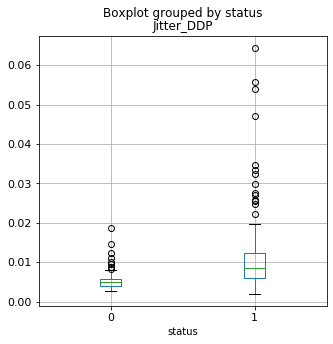

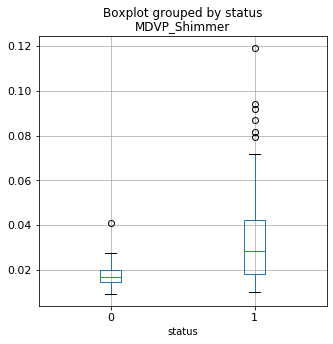

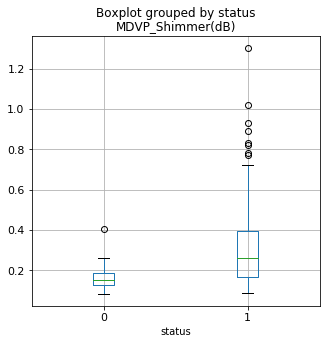

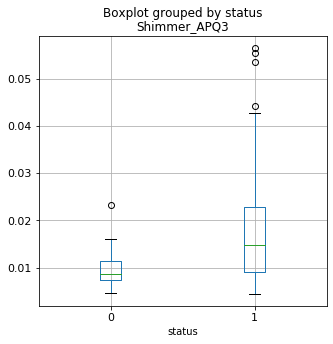

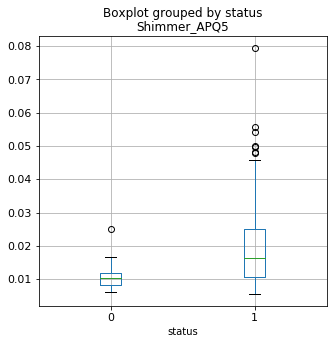

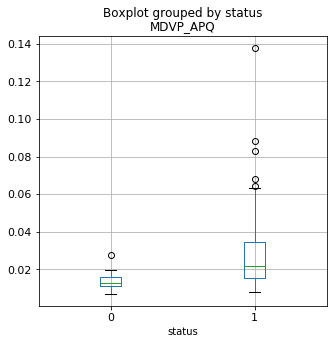

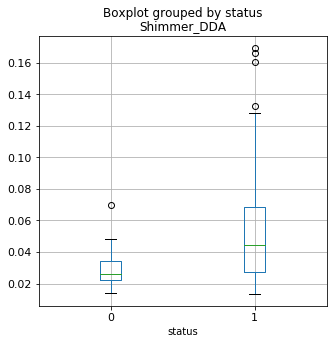

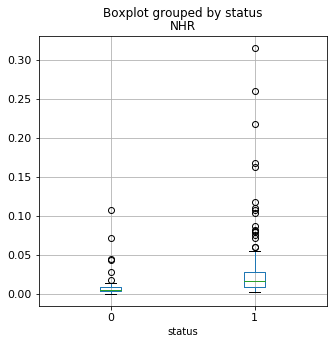

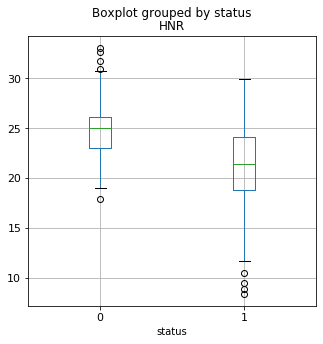

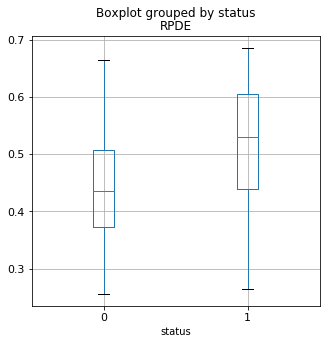

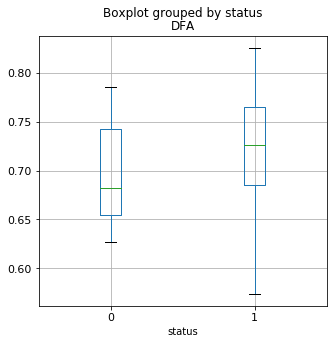

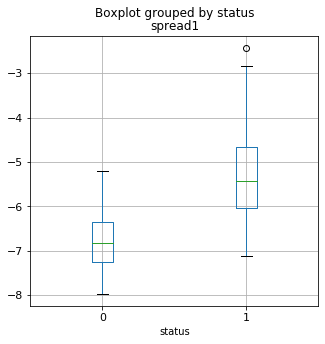

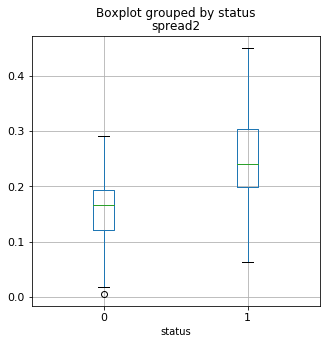

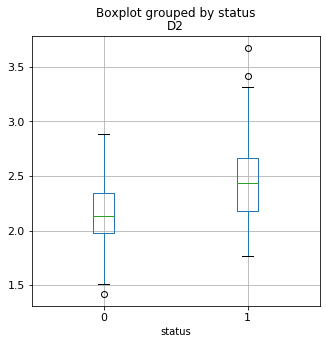

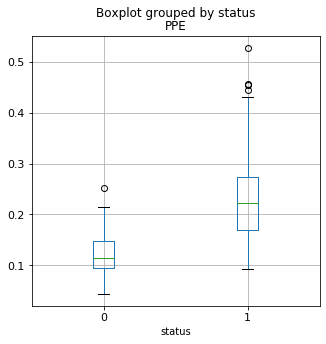

In [405]:
for fet in ind_var:
    print(prk_df.boxplot(by='status',column=fet,fontsize=11,figsize=(5,5)))

#### Below are the observations from the above analysis:

**MDVP:Fo(Hz) - Average vocal fundamental frequency :**
            **For Healthy person: is uniformly at higher range.** 
            **For person with Parkinson's disease is variable at lower range of vocal frequency.**

**MDVP_Flo(Hz) - Minimum vocal fundamental frequency:**
            **For person with parkinson's disease is 65.476 Hz which is low**



**Also range of variation in amplitude - MDVP_Shimmer  'MDVP_Shimmer','Shimmer_APQ5' is higher in data with Parkinson's disease**



**Ratio of noise to tonal components in the voice (NHR,HNR) is at higher range in Parkinson's disease**



#### All below features are also at higher range for person with Parkinson's disease:


**RPDE,D2 - Two nonlinear dynamical complexity measures**

**DFA - Signal fractal scaling exponent**

**spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation**

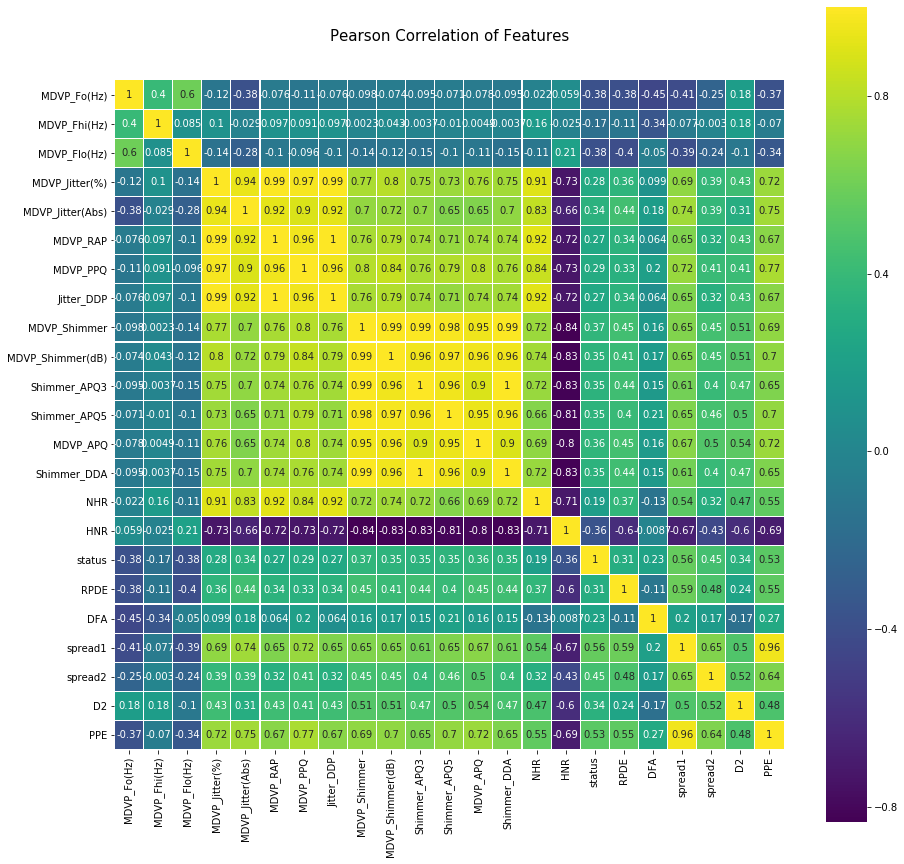

In [317]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(prk_df.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

In [318]:
# List highly correlated features
c = prk_df.corr()

# Pivots the row/class labels with respective values: matrix -> list
s = c.stack()
# Select and sort (descending) all pairs with correlation values 0.5<x<1 or -1<x<-0.5

so = s[(0.5<s) & (s<1) | (-1<s) & (s<-0.5)].sort_values(ascending=False, kind='quicksort')
print(so)

Shimmer_APQ3      Shimmer_DDA         1.000000
Shimmer_DDA       Shimmer_APQ3        1.000000
MDVP_RAP          Jitter_DDP          1.000000
Jitter_DDP        MDVP_RAP            1.000000
MDVP_Jitter(%)    Jitter_DDP          0.990276
Jitter_DDP        MDVP_Jitter(%)      0.990276
MDVP_Jitter(%)    MDVP_RAP            0.990276
MDVP_RAP          MDVP_Jitter(%)      0.990276
MDVP_Shimmer      Shimmer_DDA         0.987626
Shimmer_DDA       MDVP_Shimmer        0.987626
MDVP_Shimmer      Shimmer_APQ3        0.987625
Shimmer_APQ3      MDVP_Shimmer        0.987625
MDVP_Shimmer      MDVP_Shimmer(dB)    0.987258
MDVP_Shimmer(dB)  MDVP_Shimmer        0.987258
Shimmer_APQ5      MDVP_Shimmer        0.982835
MDVP_Shimmer      Shimmer_APQ5        0.982835
MDVP_Jitter(%)    MDVP_PPQ            0.974256
MDVP_PPQ          MDVP_Jitter(%)      0.974256
Shimmer_APQ5      MDVP_Shimmer(dB)    0.973751
MDVP_Shimmer(dB)  Shimmer_APQ5        0.973751
                  Shimmer_DDA         0.963202
Shimmer_DDA  

**All features for measures of variation in fundamental frequency :MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP are strongly correlated to each other, we can consider MVDVP Jitter(Abs) and igonore rest of the features.**

**All features for measures of variation in amplitude - MDVP:Shimmer, MDVP:Shimmer(dB), Shimmer:APQ3, Shimmer:APQ5, MDVP:APQ, Shimmer:DDA are also strongly correlated to each other, we can considerone one among them and igonore rest of the features.**



**HNR has strong negative correlation with Jitter, Shimmer and NHR : so we can igone this feature.**

#### Independent variables the can be considered are :

Vocal fundamental frequency : Avg MDVP:Fo(Hz), Max. MDVP:Fhi(Hz), Min, MDVP:Flo(Hz)

Signal fractal scaling exponent : DFA 

Two nonlinear dynamical complexity measures : RPDE,D2

nonlinear measures of fundamental frequency variation : spread2

MVDVP Jitter(Abs), Shimmer_APQ5 and 'NHR'

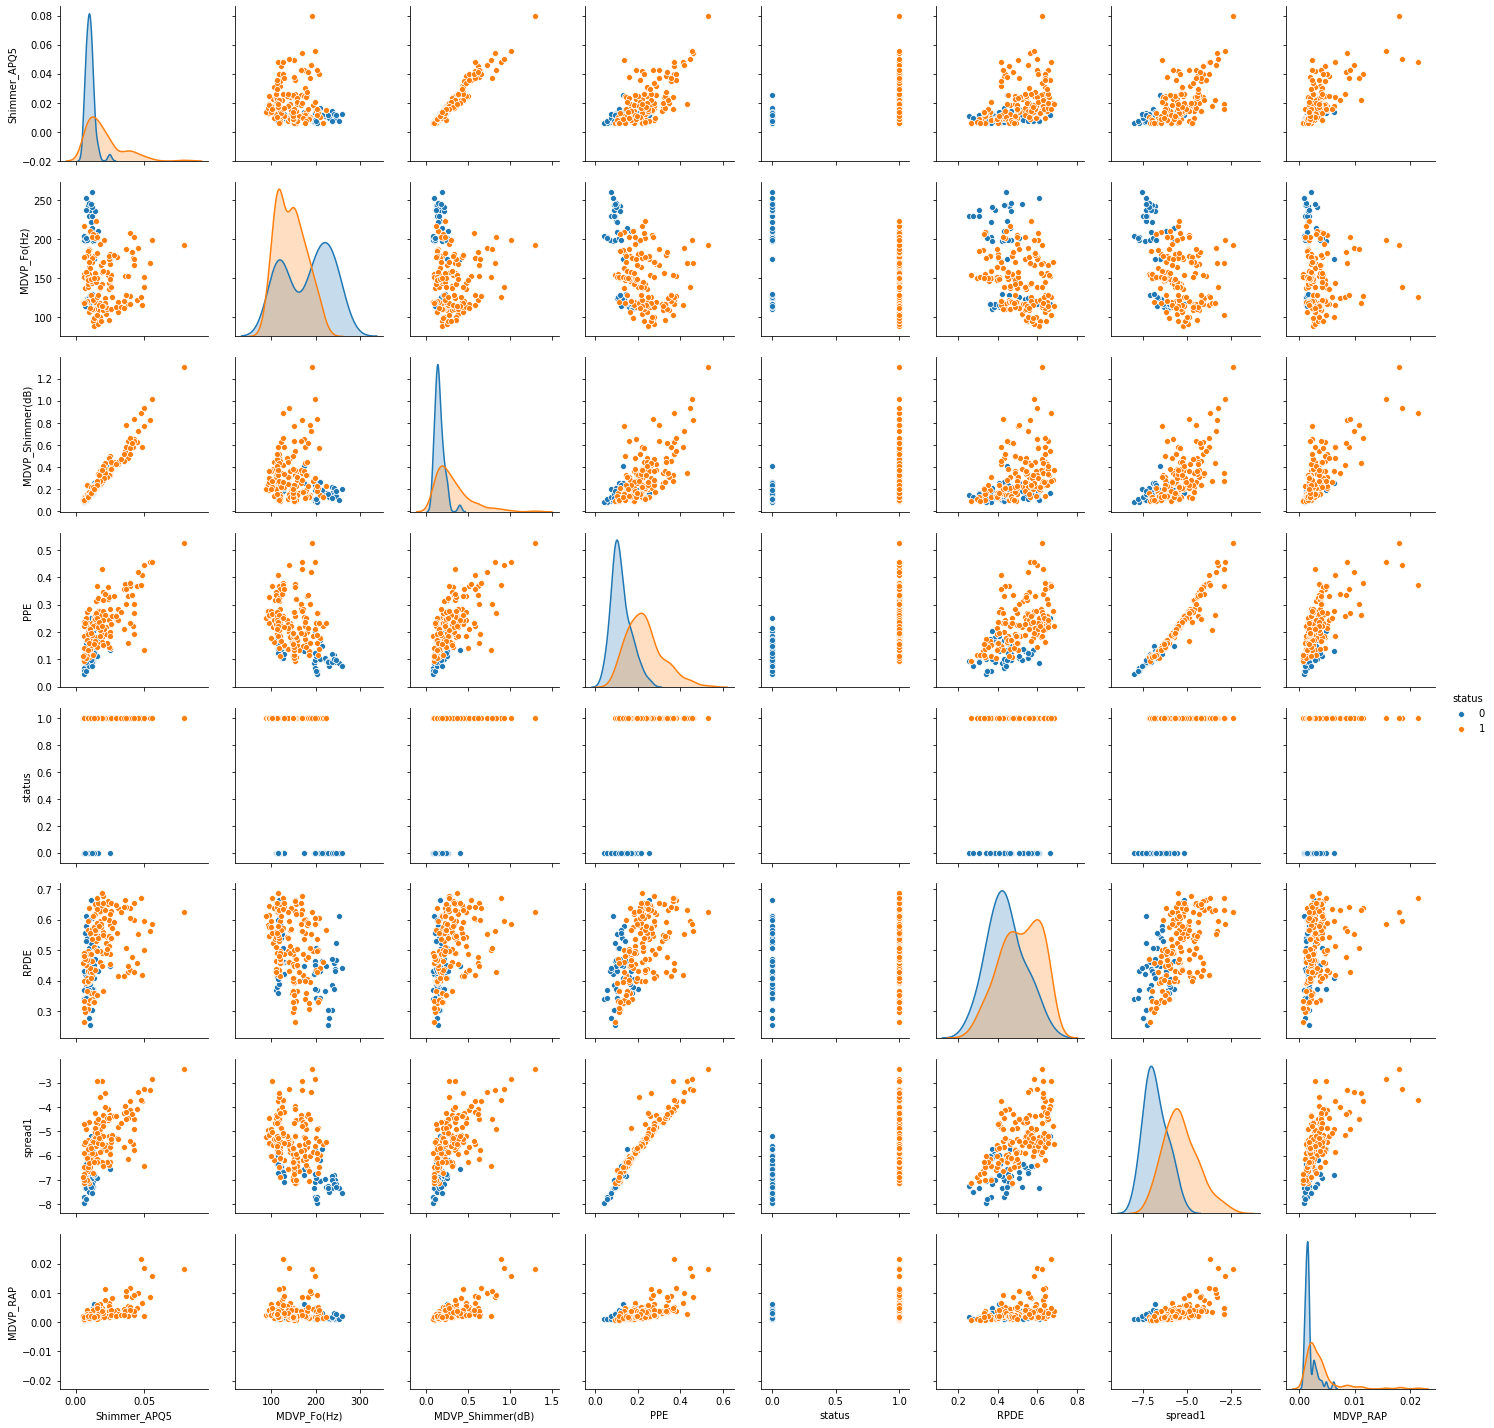

In [443]:
sns.pairplot(data=prk_df[[ 'Shimmer_APQ5', 'MDVP_Fo(Hz)', 'MDVP_Shimmer(dB)', 'PPE', 'status','RPDE', 'spread1', 'MDVP_RAP']],hue = 'status')


**Healthy population is represented by the blue dots and population with Parkinson's disease is represented in orange dots.**

### 4. Split the data set into training and test set in the ratio of 70:30 (Training:Test)

In [444]:
from sklearn.model_selection import train_test_split

X_ = prk_df.drop(['name','status'], axis=1) 
y_ = prk_df["status"]
X =  X_.to_numpy()
y =  y_.to_numpy()
print(X.shape,y.shape)

(195, 22) (195,)


In [445]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=7)

In [446]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
ind_cols = prk_df.drop(['name','status'], axis=1,inplace=False)
dep_col  = prk_df["status"]

prk_df[ind_cols.columns] = scaler.fit_transform(prk_df[ind_cols.columns])

### 5. Create the model using “entropy” method of reducing the entropy and fit it to training data.

In [447]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(criterion = 'entropy' )

In [448]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [449]:

# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )
feature_imp = pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_.columns)
print(feature_imp.sort_values("Imp", ascending = False))

                       Imp
PPE               0.365470
DFA               0.150607
Shimmer_APQ5      0.146941
MDVP_Fo(Hz)       0.122080
MDVP_Shimmer(dB)  0.088092
MDVP_RAP          0.035276
MDVP_Shimmer      0.031833
D2                0.031082
Shimmer_APQ3      0.028619
HNR               0.000000
spread2           0.000000
spread1           0.000000
MDVP_Flo(Hz)      0.000000
RPDE              0.000000
MDVP_Jitter(%)    0.000000
NHR               0.000000
Shimmer_DDA       0.000000
MDVP_Jitter(Abs)  0.000000
MDVP_Fhi(Hz)      0.000000
Jitter_DDP        0.000000
MDVP_PPQ          0.000000
MDVP_APQ          0.000000


In [576]:
X_ = prk_df.drop(['name','status'], axis=1) 
y_ = prk_df["status"]
X =  X_.to_numpy()
y =  y_.to_numpy()
print(X.shape,y.shape)

(195, 22) (195,)


### 6. Test the model on test data and what is the accuracy achieved. Capture the predicted values and do a cross-tab.

In [450]:
dt_model.score(X_test , y_test)      # performance on test data

0.9152542372881356

In [451]:
predicted_test_labels = dt_model.predict(X_test)
predicted_test_labels

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [452]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(y_test,predicted_test_labels)
conf_matrix

array([[11,  1],
       [ 4, 43]], dtype=int64)

In [453]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted_test_labels))

              precision    recall  f1-score   support

           0       0.73      0.92      0.81        12
           1       0.98      0.91      0.95        47

    accuracy                           0.92        59
   macro avg       0.86      0.92      0.88        59
weighted avg       0.93      0.92      0.92        59



**Accuracy = 0.92**

In [461]:
pd.crosstab(y_test, predicted_test_labels, rownames=['Actual Result'], colnames=['Predicted Result'], margins=True)

Predicted Result,0,1,All
Actual Result,,,
0,11,1,12
1,4,43,47
All,15,44,59


In [512]:
ct1 = pd.DataFrame(y_test, columns = ["Y_Test"])
ct2 = pd.DataFrame( predicted_test_labels, columns = ["Y_Predicted"])
print(pd.concat([ct1, ct2], axis=1))

    Y_Test  Y_Predicted
0        0            1
1        1            1
2        1            1
3        1            1
4        1            1
5        1            1
6        1            0
7        1            1
8        1            1
9        1            1
10       0            0
11       1            1
12       1            1
13       0            0
14       1            1
15       1            1
16       1            1
17       0            0
18       0            0
19       1            1
20       1            1
21       1            1
22       1            1
23       1            1
24       1            1
25       1            1
26       0            0
27       1            1
28       1            1
29       1            1
30       1            1
31       1            1
32       1            1
33       1            1
34       0            0
35       1            1
36       1            1
37       1            0
38       1            1
39       1            1
40       1      

### 7. Use regularization parameters of max_depth, min_sample_leaf to recreate the model. What is the impact on the model accuracy? How does regularization help?

In [522]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,  predicted_test_labels)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9157801418439716

**max_depths**

**This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data.
We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.**

In [540]:
max_depths = np.linspace(1, 32, 32, endpoint=True)
train_results = []
test_results = []
for max_depth in max_depths:
    dt = DecisionTreeClassifier(max_depth=max_depth)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous train results
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    # Add auc score to previous test results
    test_results.append(roc_auc)
   

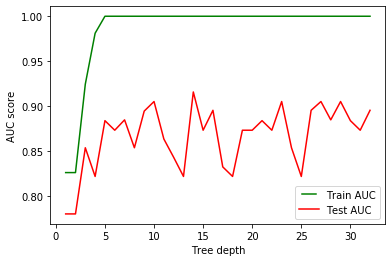

In [542]:
from matplotlib.legend_handler import HandlerLine2D

line1, = plt.plot(max_depths, train_results, 'g', label="Train AUC")
line2, = plt.plot(max_depths, test_results, 'r', label="Test AUC")

plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})

plt.ylabel('AUC score')
plt.xlabel('Tree depth')
plt.show()

**We see that our model overfits for large depth values (above tree depth 5). 
The tree predicts all of the train data, however, it fails to generalize the findings for new data**

**min_samples_leaf**

**This is the minimum number of samples required to be at a leaf node**

In [543]:
min_samples_leafs = np.linspace(0.1, 0.5, 5, endpoint=True)
train_results = []
test_results = []
for min_samples_leaf in min_samples_leafs:
    dt = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)


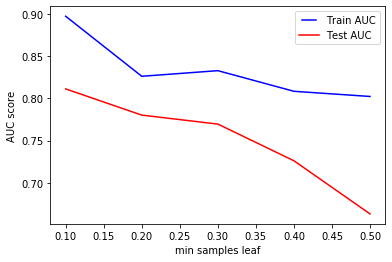

In [545]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples_leafs, train_results, 'b', label="Train AUC")
line2, = plt.plot(min_samples_leafs, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('min samples leaf')
plt.show()

Increasing this value may cause underfitting.the model cannot learn enough about the data by increasing the samples

**max_features**

**max_features represents the number of features to consider when looking for the best split.**

In [607]:
max_features = list(range(1,X.shape[1]))
train_results = []
test_results = []
for max_feature in max_features:
    dt = DecisionTreeClassifier(max_features=max_feature)
    dt.fit(X_train, y_train)
    train_pred = dt.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = dt.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)


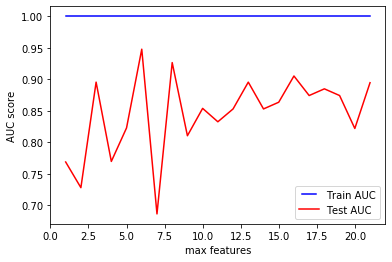

In [608]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(max_features, train_results, 'b', label="Train AUC")
line2, = plt.plot(max_features, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('max features')
plt.show()

**This is also an overfitting case. It’s unexpected to get overfitting for all values of max_features.**

In [615]:
dt_model = DecisionTreeClassifier(criterion = 'entropy', random_state=7, max_depth = 5, min_samples_leaf=0.1)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=0.1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=7, splitter='best')

In [616]:
dt_model.score(X_test , y_test)

0.847457627118644

In [617]:
y_predict = dt_model.predict(X_test)

In [618]:
print(confusion_matrix(y_test, y_predict))

[[ 9  3]
 [ 6 41]]


One descision tree oribe to overfitting

### 8. Next implement the decision tree using Random Forest. What is the optimal number of trees that gives the best result?

In [602]:
n_estimators = [1, 2, 4, 8, 16, 32, 64, 100, 200]
train_results = []
test_results = []
for estimator in n_estimators:
    rf = RandomForestClassifier(n_estimators=estimator, n_jobs=-1)
    rf.fit(X_train, y_train)
    train_pred = rf.predict(X_train)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    train_results.append(roc_auc)
    y_pred = rf.predict(X_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    test_results.append(roc_auc)


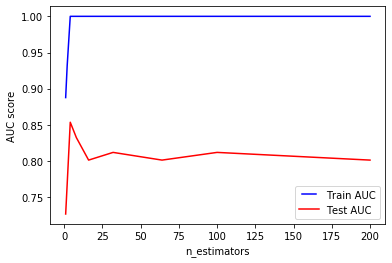

In [603]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators, train_results, 'b', label="Train AUC")
line2, = plt.plot(n_estimators, test_results, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel('AUC score')
plt.xlabel('n_estimators')
plt.show()

**We can see that for our data, we can stop at 10 trees as increasing the number of trees decreases the test performance**

**RandomForest**

In [637]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 10,criterion = 'entropy', random_state=7, max_depth = 5, min_samples_leaf=.1 ,max_features=5,bootstrap=True)
rfcl = rfcl.fit(X_train, y_train)

In [638]:
dt_model.score(X_test , y_test)

0.847457627118644

In [636]:
y_predict = rfcl.predict(X_test)
print(metrics.confusion_matrix(y_test, y_predict))

[[ 5  7]
 [ 5 42]]


**By analysis found thet n_estimators = 10, max_depth = 5, min_samples_leaf=.1 ,max_features=5**